In [1]:

import numpy as np
import pandas as pd

import yfinance as yf
import pandas_datareader as pdr

import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date


# Question 1: What is the average growth (in %) of GDP in 2023?

Download the timeseries Real Gross Domestic Product (GDPC1) from FRED (https://fred.stlouisfed.org/series/GDPC1). Calculate year-over-year (YoY) growth rate (that is, divide current value to one 4 quarters ago). Find the average YoY growth in 2023 (average from 4 YoY numbers). Round to 1 digit after the decimal point: e.g. if you get 5.66% growth => you should answer 5.7

In [20]:
end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

start = date(year=end.year-5, month=end.month, day=end.day)
print(f'Period for indexes: {start} to {end} ')

Year = 2024; month= 4; day=21
Period for indexes: 2019-04-21 to 2024-04-21 


In [21]:
gdpc1 = pdr.DataReader("GDPC1", "fred", start=start)

In [24]:
gdpc1['gdpc1_yoy'] = gdppot.GDPC1/gdppot.GDPC1.shift(4)-1

In [25]:
gdpc1.tail()

,GDPC1,gdpc1_yoy
DATE,,
2022-10-01,21989.981,0.006517
2023-01-01,22112.329,0.017179
2023-04-01,22225.350,0.023825
2023-07-01,22490.692,0.029269
2023-10-01,22679.255,0.031345


In [30]:
gdpc1.loc["2023"].mean()

GDPC1        22376.906500
gdpc1_yoy        0.025404
dtype: float64

The average year over year growth rate was 2.5%.

# Question 2: Find the min value of (dgs10-dgs2) after since year 2000 (2000-01-01) and write it down as an answer, round to 1 digit after the decimal point.

Download DGS2 and DGS10 interest rates series (https://fred.stlouisfed.org/series/DGS2, https://fred.stlouisfed.org/series/DGS10). Join them together to one dataframe on date (you might need to read about pandas.DataFrame.join()), calculate the difference dgs10-dgs2 daily.

(Additional: think about what does the "inverted yield curve" mean for the market and investors? do you see the same thing in your country/market of interest? Do you think it can be a good predictive feature for the models?)

In [35]:
start = date(year=1999, month=1, day=1)

In [36]:
dgs2 = pdr.DataReader("DGS2", "fred", start=start)
dgs2.head()

,DGS2
DATE,
1999-01-01,NaN
1999-01-04,4.58
1999-01-05,4.64
1999-01-06,4.62
1999-01-07,4.63


In [37]:
dgs10 = pdr.DataReader("DGS10", "fred", start=start)
dgs10.tail()

,DGS10
DATE,
2024-04-12,4.50
2024-04-15,4.63
2024-04-16,4.67
2024-04-17,4.59
2024-04-18,4.64


In [40]:
dgs = dgs10.join(dgs2)

In [42]:
dgs['diff'] = dgs['DGS10'] - dgs['DGS2']

In [55]:
dgs[dgs.index.year > 2000]['diff'].idxmin()

Timestamp('2023-07-03 00:00:00')

In [57]:
dgs[dgs.index.year > 2000]['diff'].min()

-1.0800000000000005

In [56]:
dgs.loc[dgs[dgs.index.year > 2000]['diff'].idxmin()]

DGS10    3.86
DGS2     4.94
diff    -1.08
Name: 2023-07-03 00:00:00, dtype: float64

The minimum difference is -1.1. It means that investors will get less interest rates for secure long term investments. The market expect interest rates to drop.

# Question 3: Compare S&P 500 and IPC Mexico indexes by the 5 year growth and write down the largest value as an answer (%)

Download on Yahoo Finance two daily index prices for S&P 500 (^GSPC, https://finance.yahoo.com/quote/%5EGSPC/) and IPC Mexico (^MXX, https://finance.yahoo.com/quote/%5EMXX/). Compare 5Y growth for both (between 2019-04-09 and 2024-04-09). Select the higher growing index and write down the growth in % (closest integer %). E.g. if ratio end/start was 2.0925 (or growth of 109.25%), you need to write down 109 as your answer.

(Additional: think of other indexes and try to download stats and compare the growth? Do create 10Y and 20Y growth stats. What is an average yearly growth rate (CAGR) for each of the indexes you select?)

In [2]:
SNP_500_daily = yf.download(tickers = "^GSPC", period = "max", interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [3]:
SNP_500_daily.loc['2018':].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,2683.729980,2695.889893,2682.360107,2695.810059,2695.810059,3397430000
2018-01-03,2697.850098,2714.370117,2697.770020,2713.060059,2713.060059,3544030000
2018-01-04,2719.310059,2729.290039,2719.070068,2723.989990,2723.989990,3697340000
2018-01-05,2731.330078,2743.449951,2727.919922,2743.149902,2743.149902,3239280000
2018-01-08,2742.669922,2748.510010,2737.600098,2747.709961,2747.709961,3246160000


<Axes: xlabel='Date'>

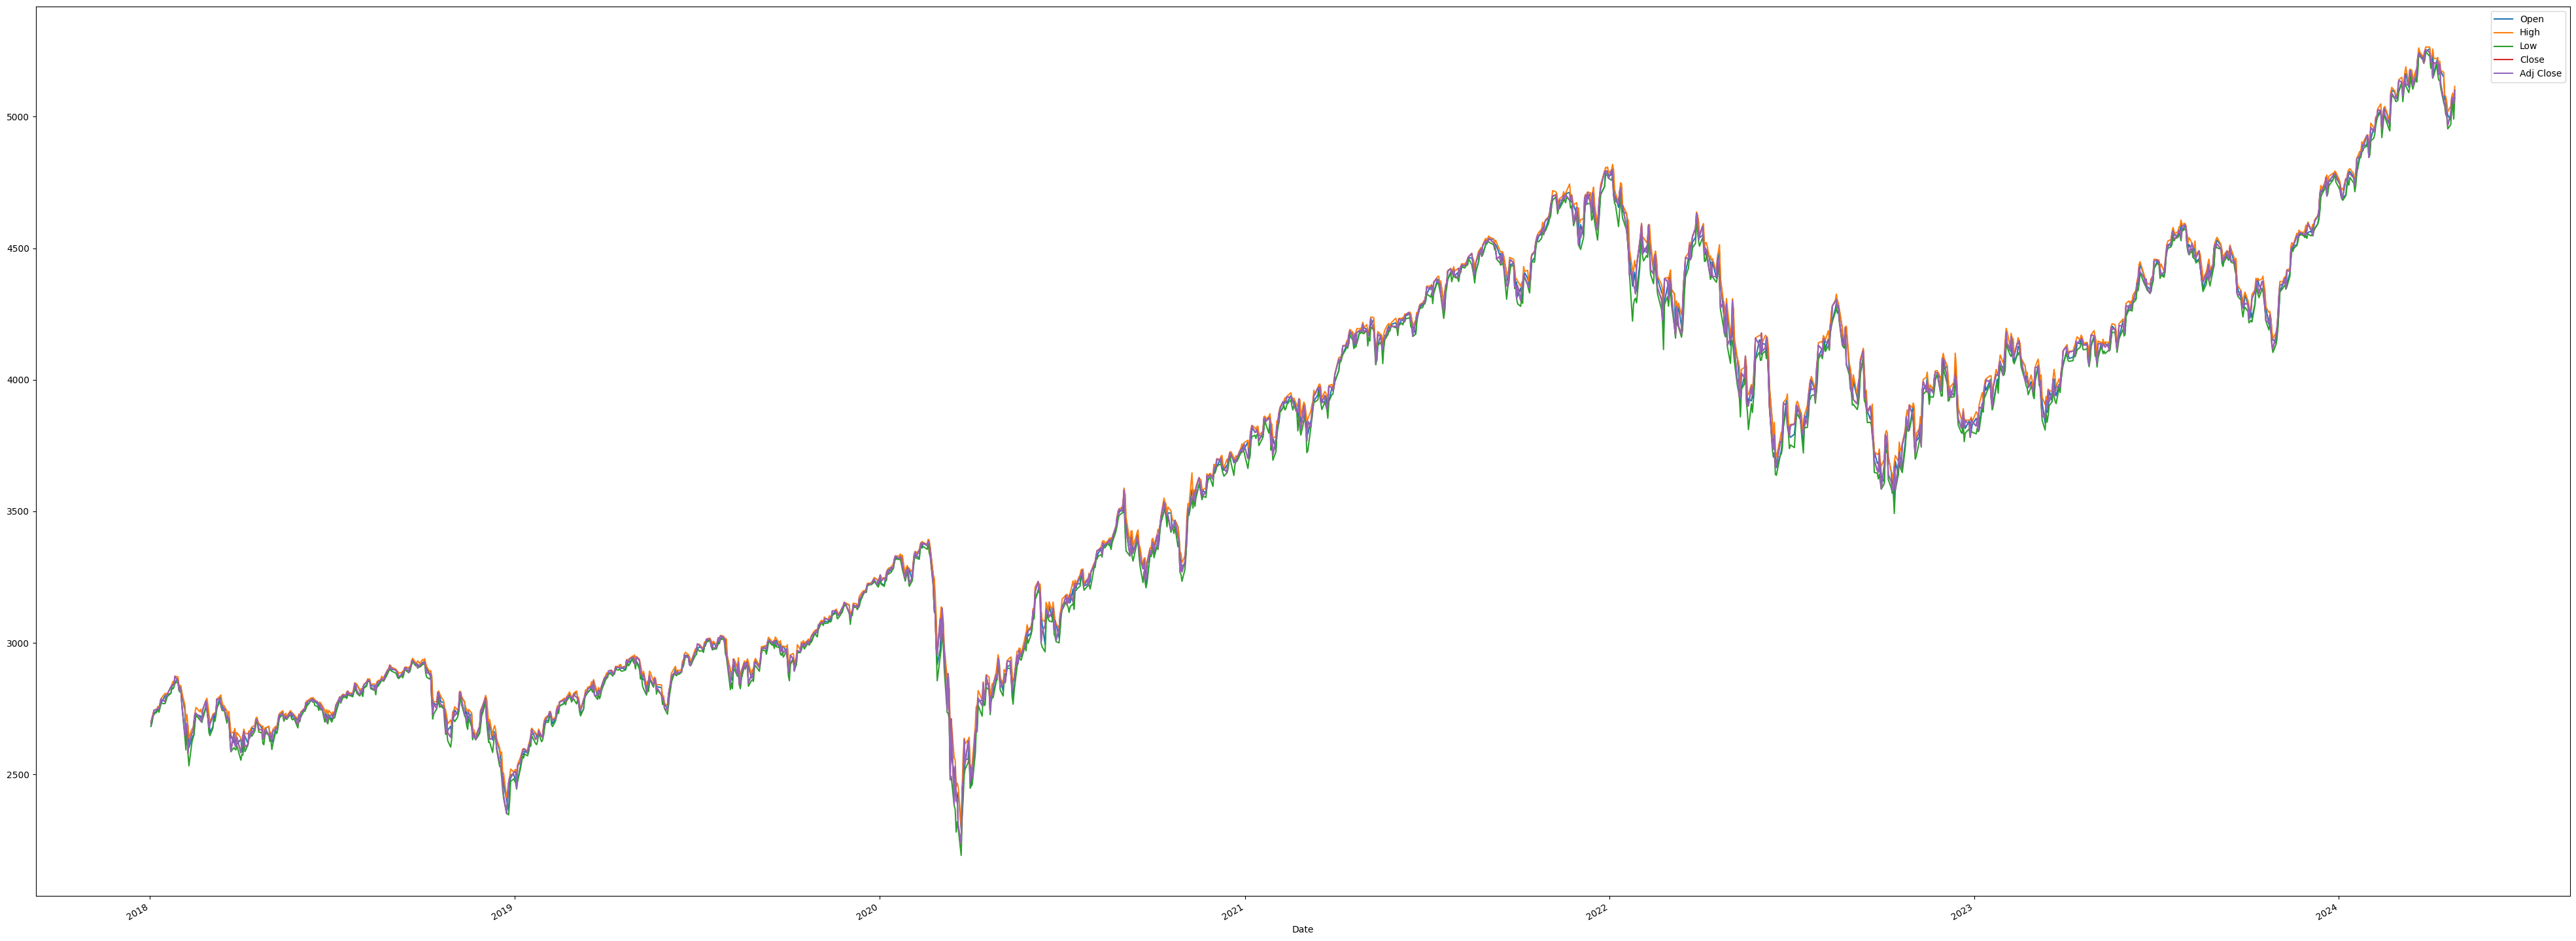

In [4]:
SNP_500_daily.loc['2018':, SNP_500_daily.columns != 'Volume'].plot(figsize=(50,20))

In [5]:
SNP_500_daily['adj_close_5_year'] = SNP_500_daily['Adj Close'].shift(252*5)
SNP_500_daily['5y_growth'] = SNP_500_daily['Adj Close'] / SNP_500_daily['adj_close_5_year'] -1

In [6]:
SNP_500_daily.tail()

,Open,High,Low,Close,Adj Close,Volume,adj_close_5_year,5y_growth
Date,,,,,,,,
2024-04-22,4987.330078,5038.839844,4969.399902,5010.600098,5010.600098,3820250000,2905.030029,0.724801
2024-04-23,5028.850098,5076.120117,5027.959961,5070.549805,5070.549805,3751400000,2907.969971,0.743673
2024-04-24,5084.859863,5089.479980,5047.020020,5071.629883,5071.629883,3656740000,2933.679932,0.728760
2024-04-25,5019.879883,5057.750000,4990.580078,5048.419922,5048.419922,3958050000,2927.250000,0.724629
2024-04-26,5084.649902,5114.620117,5073.140137,5099.959961,5099.959961,3604140000,2926.169922,0.742879


In [7]:
IPCM_daily = yf.download(tickers = "^MXX", period = "max", interval = "1d")
IPCM_daily['adj_close_5_year'] = IPCM_daily['Adj Close'].shift(252*5)
IPCM_daily['5y_growth'] = IPCM_daily['Adj Close'] / IPCM_daily['adj_close_5_year'] -1

[*********************100%%**********************]  1 of 1 completed


In [8]:
IPCM_daily.tail()

,Open,High,Low,Close,Adj Close,Volume,adj_close_5_year,5y_growth
Date,,,,,,,,
2024-04-22,55852.281250,56615.878906,55771.550781,56551.898438,56551.898438,183161700,45381.218750,0.246152
2024-04-23,56564.578125,56906.800781,56300.359375,56633.750000,56633.750000,204292000,45148.320312,0.254393
2024-04-24,56622.160156,56827.019531,56188.890625,56463.988281,56463.988281,254687400,45045.328125,0.253493
2024-04-25,56619.089844,57282.328125,56207.449219,57071.781250,57071.781250,264895300,45026.679688,0.267510
2024-04-26,57072.960938,58002.171875,56870.171875,57833.851562,57833.851562,156980900,44974.968750,0.285912


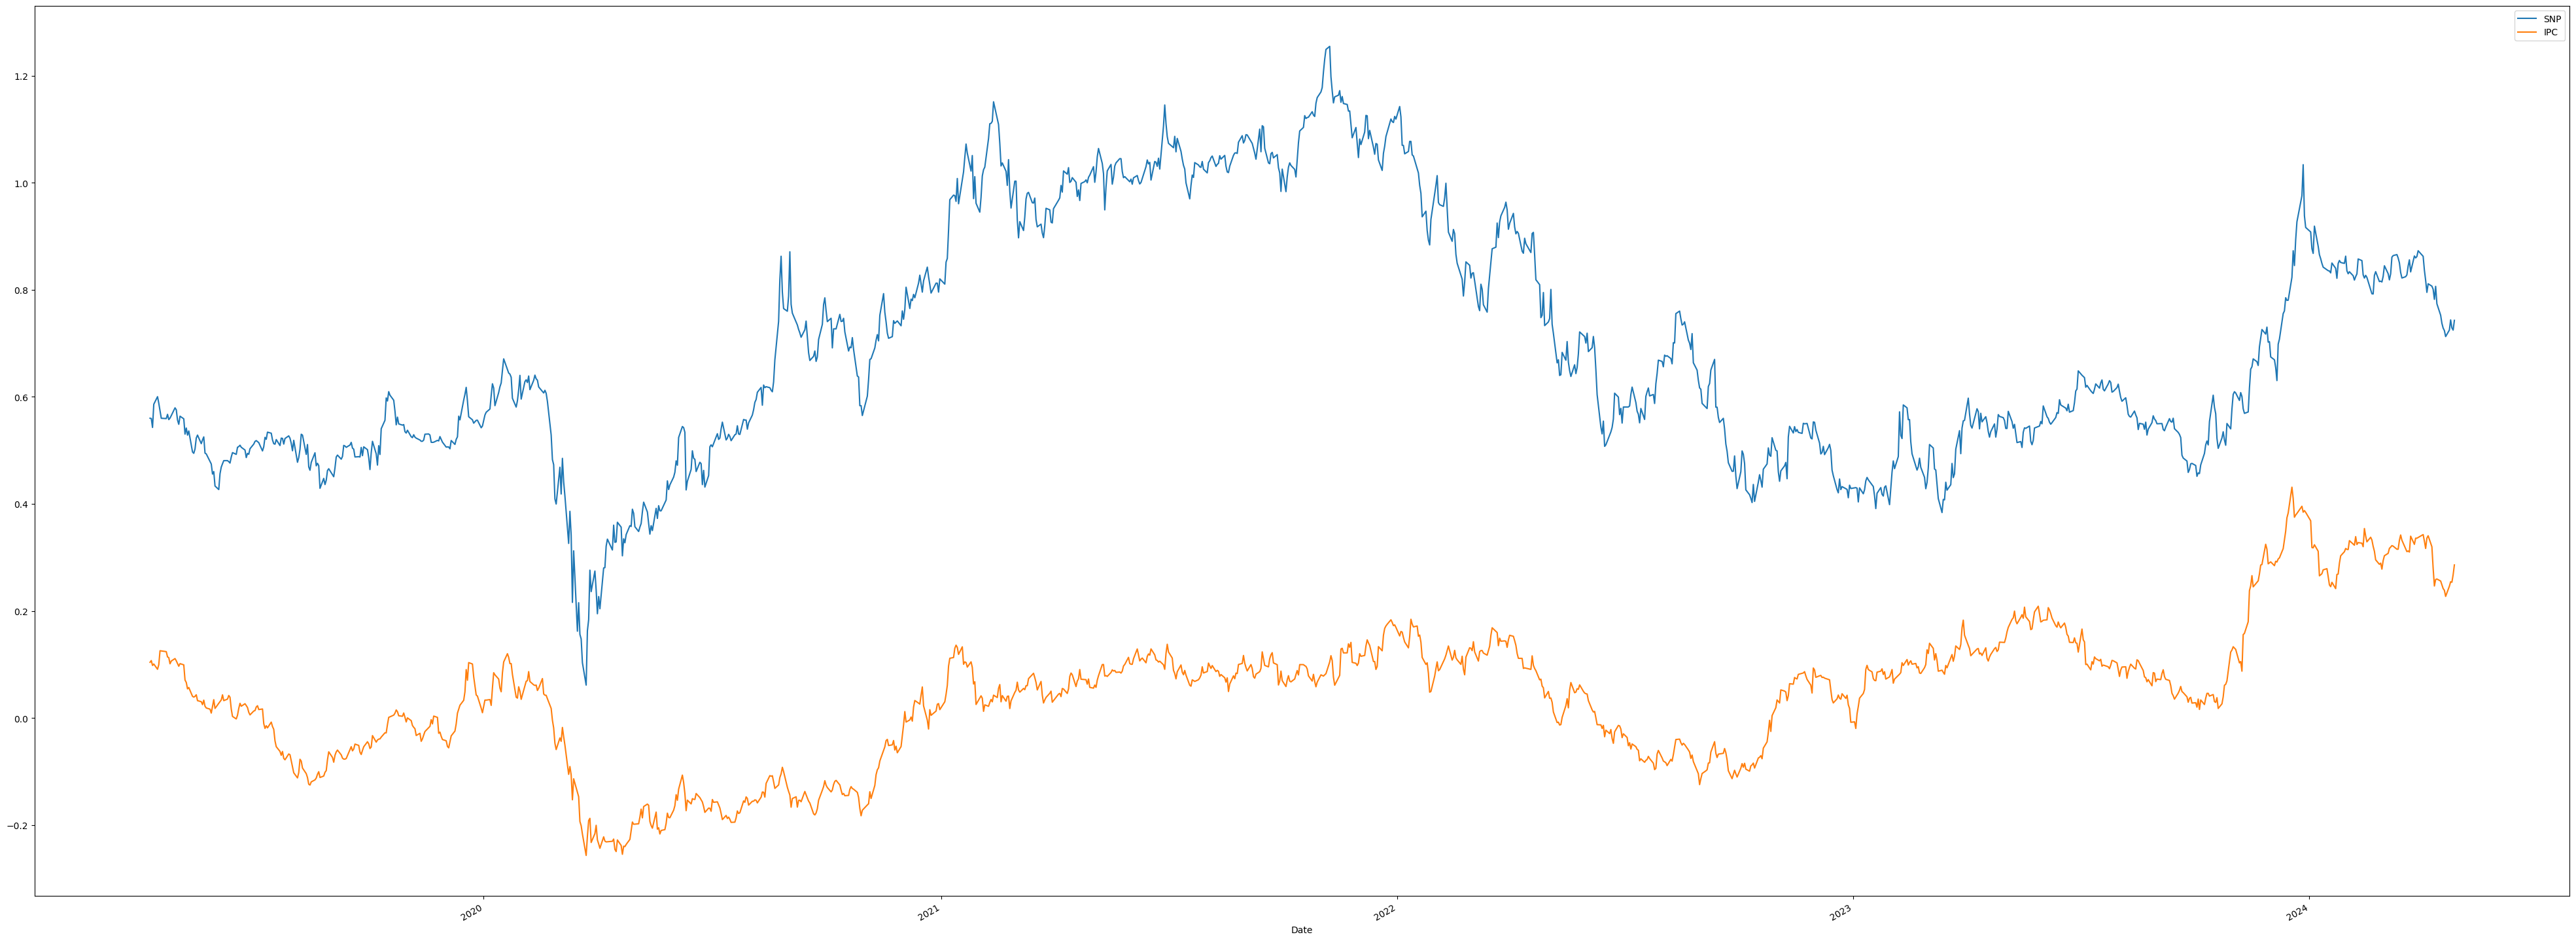

In [9]:
ax = SNP_500_daily.loc['2019-04-9':, '5y_growth'].plot(figsize=(50,20), label='SNP')
IPCM_daily.loc['2019-04-9':, '5y_growth'].plot(ax=ax, label='IPC')
ax.legend()

In [10]:
SNP_500_daily.loc['2019-04-9':, '5y_growth'].idxmax()

Timestamp('2021-11-08 00:00:00')

In [11]:
SNP_500_daily.loc[SNP_500_daily.loc['2019-04-9':, '5y_growth'].idxmax(), '5y_growth']

1.2548174975064095

The highest 5 year growth was 125%/ 

In [16]:
SNP_500_daily.loc['2024-04-09', 'Adj Close'] / SNP_500_daily.loc['2019-04-9', 'Adj Close'] -1

0.8101279426847174

I should have calculated the grwoth between the dates not the highest reported.

# Question 4: Find the largest range ratio [=(max-min)/max] of Adj.Close prices in 2023

Download the 2023 daily OHLCV data on Yahoo Finance for top6 stocks on earnings (https://companiesmarketcap.com/most-profitable-companies/): 2222.SR,BRK-B, AAPL, MSFT, GOOG, JPM.

Here is the example data you should see in Pandas for "2222.SR": https://finance.yahoo.com/quote/2222.SR/history

Calculate maximum-minimim "Adj.Close" price for each stock and divide it by the maximum "Adj.Close" value. Round the result to two decimal places (e.g. 0.1575 will be 0.16)

(Additional: why this may be important for your research?)

In [ ]:
stocks = ['2222.SR', 'BRK-B', 'AAPL', 'MSFT', 'GOOG', 'JPM']

In [149]:
data = yf.download("2222.SR BRK-B AAPL MSFT GOOG JPM", start="2023-01-01", end="2024-01-01")

[*********************100%%**********************]  6 of 6 completed


In [150]:
data['Adj Close'].min()

Ticker
2222.SR     27.245359
AAPL       124.166641
BRK-B      293.510010
GOOG        86.769997
JPM        120.737236
MSFT       219.949371
dtype: float64

In [151]:
data['Adj Close'].max()

Ticker
2222.SR     34.660252
AAPL       197.857529
BRK-B      370.480011
GOOG       142.820007
JPM        168.274750
MSFT       381.993622
dtype: float64

In [152]:
((data['Adj Close'].max()-data['Adj Close'].min())/data['Adj Close'].max()).round(2)

Ticker
2222.SR    0.21
AAPL       0.37
BRK-B      0.21
GOOG       0.39
JPM        0.28
MSFT       0.42
dtype: float64

The largest range ratio is 0.42 for MSFT. For this stock the price fluctuated the most, which means high risk, but also potential return.

# Question 5: Find the largest dividend yield for the same set of stocks

Use the same list of companies (2222.SR,BRK-B, AAPL, MSFT, GOOG, JPM) and download all dividends paid in 2023. You can use get_actions() method or .dividends field in yfinance library (https://github.com/ranaroussi/yfinance?tab=readme-ov-file#quick-start)

Sum up all dividends paid in 2023 per company and divide each value by the closing price (Adj.Close) at the last trading day of the year.

Find the maximm value in % and round to 1 digit after the decimal point. (E.g., if you obtained $1.25 dividends paid and the end year stock price is $100, the dividend yield is 1.25% -- and your answer should be equal to 1.3)

In [153]:
stocks = ['2222.SR', 'BRK-B', 'AAPL', 'MSFT', 'GOOG', 'JPM']
year = '2023'

for stock in stocks:
    ticker = yf.Ticker(stock)
    print(ticker.get_dividends().loc[year])
    div = ticker.get_dividends().loc[year].sum()
    price = ticker.history(start='2023-12-25', end='2024-01-05').loc['2023'].iloc[-1]['Close']
    print(price)
    print(f'name: {stock} - div: {div} - last price {price} - div/price: {100*div/price}')

Date
2023-03-15 00:00:00+03:00    0.302364
2023-05-17 00:00:00+03:00    0.302400
2023-09-11 00:00:00+03:00    0.153000
2023-11-15 00:00:00+03:00    0.153000
Name: Dividends, dtype: float64
32.82804870605469
name: 2222.SR - div: 0.9107640000000001 - last price 32.82804870605469 - div/price: 2.774347047413823
Series([], Name: Dividends, dtype: float64)
356.6600036621094
name: BRK-B - div: 0.0 - last price 356.6600036621094 - div/price: 0.0
Date
2023-02-10 00:00:00-05:00    0.23
2023-05-12 00:00:00-04:00    0.24
2023-08-11 00:00:00-04:00    0.24
2023-11-10 00:00:00-05:00    0.24
Name: Dividends, dtype: float64
192.28463745117188
name: AAPL - div: 0.95 - last price 192.28463745117188 - div/price: 0.4940592304162832
Date
2023-02-15 00:00:00-05:00    0.68
2023-05-17 00:00:00-04:00    0.68
2023-08-16 00:00:00-04:00    0.68
2023-11-15 00:00:00-05:00    0.75
Name: Dividends, dtype: float64
375.34588623046875
name: MSFT - div: 2.79 - last price 375.34588623046875 - div/price: 0.7433143940964608


The largest dividend yield in 2023 among the selected stocks was 2.8%.

# Question 6: Download and explore a few additional metrics or time series that might be valuable for your project and write down why (briefly).

- It would be interesting to monitor social media mentions wiht sentiment analysis. How many posts are positive and how many negative and how does this change over time.
- It could be interesting to look at unemployment data (Using Bureau of Labor Statistics (BLS) API)

# Question 7: Time-driven strategy description around earnings releases

Explore earning dates for the whole month of April - e.g. using YahooFinance earnings calendar (https://finance.yahoo.com/calendar/earnings?from=2024-04-21&to=2024-04-27&day=2024-04-23). Compare with the previous closed earnings (e.g., recent dates with full data https://finance.yahoo.com/calendar/earnings?from=2024-04-07&to=2024-04-13&day=2024-04-08).

Describe an analytical strategy/idea (you're not required to implement it) to select a subset companies of interest based on the future events data.

It might be possible to look at the earning forecast and the historic earnings and see if there is a trend. It could be interesting to look at companies in that are in the same sector and already had their earning calls. This might identify if it is a challenging time for the sector.